In [12]:
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import rioxarray
from shapely import wkt
from libpysal import weights
import rasterstats

from cycler import cycler
from matplotlib import pyplot as plt

# global plotting settings
plt.style.use(['ggplot'])
default_cycler = (plt.rcParams['axes.prop_cycle'][:4]  +
                  cycler(linestyle=['-', '--', ':', '-.']))
plt.rcParams.update({'axes.grid' : True, 
                     'axes.facecolor' : 'white', 
                     'axes.edgecolor' : '.15',
                     'grid.color' : '.8',
                     'axes.prop_cycle' : default_cycler,
                     'figure.figsize' : (15, 5)
                    })

# geopandas

In [2]:
glim = xr.open_dataset('./glim_wgs84_0point5deg_Raster.nc').to_dataframe().reset_index()
glim = glim.rename(columns={'glim_wgs84_0point5deg.tif' : 'glim',
                           'x' : 'longitude',
                           'y' : 'latitude'})

glim = gpd.GeoDataFrame(glim, 
                        geometry=gpd.GeoSeries.from_xy(glim.longitude, glim.latitude), 
                        crs='epsg:4326')

In [16]:
# glimr = rasterstats.point_query('sahara.shp', './glim_wgs84_0point5deg_Raster.nc', interpolate='nearest')

In [2]:
# replace missing data (-9999, 15, 0)
# ignore unconsol (1), metamorphic (8), pyroclastic (12), water bodies (11), evaporite (14), ice and glacier (16)
litho = ( glim.replace([-9999, 15, 0, 1, 11, 16, 8, 12, 14], np.nan)
              .replace([2, 4, 7, 9, 10, 13], 2)
              .replace([3, 5, 6], 3)
              .assign(contact1 = np.zeros(len(glim)),
                      contact2 = np.zeros(len(glim)))
        )

wq = weights.contiguity.Queen.from_dataframe(litho)

contact1 = 2
contact2 = 3

for i in range(len(litho)):
    if (litho.glim.iloc[i] == contact1) & (litho.loc[wq.neighbors[i]].glim == contact2).any():
        litho.loc[i, 'contact1'] = True

for i in range(len(litho)):
    if (litho.glim.iloc[i] == contact2) & (litho.loc[wq.neighbors[i]].glim == contact1).any():
        litho.loc[i, 'contact2'] = True

/home/otto/anaconda3/lib/python3.8/site-packages/libpysal/weights/util.py:1073: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = np.vstack([np.array(shape.centroid) for shape in first_choice])


In [3]:
# litho.to_file("litho.geojson", driver='GeoJSON')

In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

(17.0, 30.0)

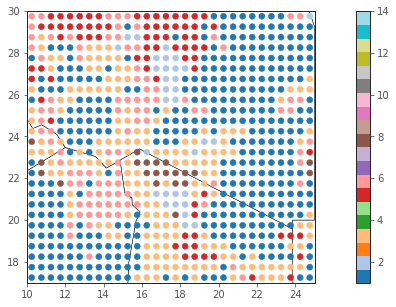

In [29]:
xstart = 10
xstop = 25
ystart = 17
ystop = 30

ax = world.cx[xstart:xstop, ystart:ystop].plot(color='white', edgecolor='black')
glim.cx[xstart:xstop, ystart:ystop].plot(column='glim', legend=True, ax=ax, cmap='tab20')

ax.set_xlim(xstart, xstop)
ax.set_ylim(ystart, ystop)

<AxesSubplot:>

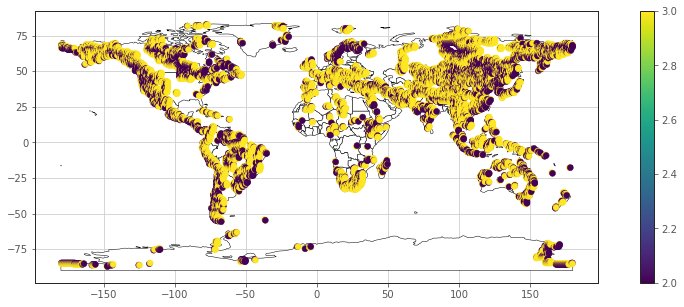

In [5]:
ax = world.plot(color='white', edgecolor='black')

mask = (litho['contact1']==True) | (litho['contact2']==True)

litho.loc[mask].plot(column='glim', legend=True, ax=ax)

(-30.0, -20.0)

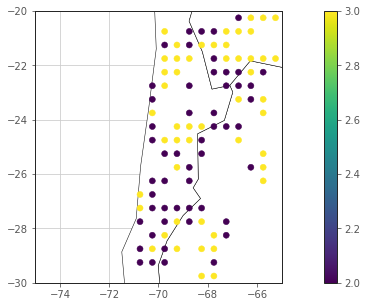

In [16]:
mask = (litho['contact1']==True) | (litho['contact2']==True)

xstart = -75
xstop = -65
ystart = -30
ystop = -20

ax = world.cx[xstart:xstop, ystart:ystop].plot(color='white', edgecolor='black')
litho.cx[xstart:xstop, ystart:ystop].loc[mask].plot(column='glim', legend=True, ax=ax)

ax.set_xlim(xstart, xstop)
ax.set_ylim(ystart,ystop)

(0.0, 50.0)

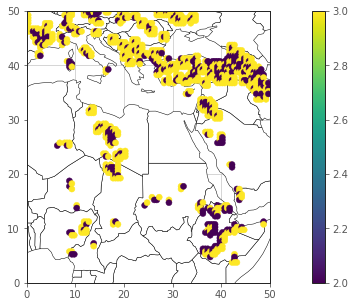

In [19]:
xstart = 0
xstop = 50
ystart = 0
ystop = 50

ax = world.cx[xstart:xstop, ystart:ystop].plot(color='white', edgecolor='black')
litho.cx[xstart:xstop, ystart:ystop].loc[mask].plot(column='glim', legend=True, ax=ax)

ax.set_xlim(xstart, xstop)
ax.set_ylim(ystart, ystop)

(17.0, 30.0)

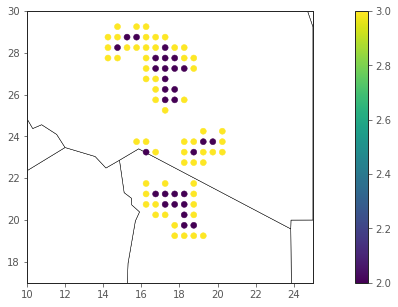

In [20]:
mask = (litho['contact1']==True) | (litho['contact2']==True)

xstart = 10
xstop = 25
ystart = 17
ystop = 30

ax = world.cx[xstart:xstop, ystart:ystop].plot(color='white', edgecolor='black')
litho.cx[xstart:xstop, ystart:ystop].loc[mask].plot(column='glim', legend=True, ax=ax)

ax.set_xlim(xstart, xstop)
ax.set_ylim(ystart, ystop)